In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
aisles = pd.read_csv('./data/instacart-market-basket-analysis/aisles.csv')
departments = pd.read_csv('./data/instacart-market-basket-analysis/departments.csv')
order_products_train = pd.read_csv('./data/instacart-market-basket-analysis/order_products__train.csv')
orders = pd.read_csv('./data/instacart-market-basket-analysis/orders.csv')
products = pd.read_csv('./data/instacart-market-basket-analysis/products.csv')

In [3]:
# 크기 / 메모리 / columns, dtype
print('---------------------light---------------------')
print(orders.info())
print('-------------deep(analyze object)--------------')
print(orders.info(memory_usage='deep'))

---------------------light---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
None
-------------deep(analyze object)--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_

In [4]:
aisles # 품목의 중분류

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [5]:
departments # 품목의 대분류

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [6]:
products # 상품 이름 자체 (소분류) - 중분류, 대분류 포함

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [7]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


- [days_since_prior_order] 이전 order 가 몇 일 전에 있었는가.
- [order_number] 구매 횟수
- [order_dow] 요일
- [order_hour_of_day] 구매 시간

In [8]:
order_products_train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


- [add_to_cart_order] 장바구니에 담은 개수

### EDA

In [9]:
# Q1. 어떤 producti가 가장 많이 reorder 가 되었는가?
pd.pivot_table(order_products_train, index=["product_id"], values="reordered", aggfunc="sum")

# Q1-1. product 개수는 49688개 인데, Q1의 결과로 39123개만 나올까?? 
# -> Order 가 아예 이루어지지 않았다.

,reordered
product_id,
1,49
2,1
3,6
4,14
5,1
...,...
49682,0
49683,1709
49686,5


In [10]:
# Q2. 가장 많이 주문된 Product 는 ?
pd.pivot_table(order_products_train, index=["product_id"], values="reordered", aggfunc="sum")\
  .sort_values(by="reordered", ascending=False)

,reordered
product_id,
24852,16557
13176,13362
21137,8603
21903,8055
47766,6226
...,...
26461,0
41292,0
26464,0


In [11]:
products[products.product_id==24852]

,product_id,product_name,aisle_id,department_id
24851,24852,Banana,24,4


In [12]:
# 위 id 를 name 으로 바로 찾기 위해서.
data = pd.merge(order_products_train, products, on="product_id", how="inner")
# products_id 로 구분시 order_products_train < products
# inner join 시 products 의 일부가 지워진다.

In [13]:
data

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,816049,49302,7,1,Bulgarian Yogurt,120,16
2,1242203,49302,1,1,Bulgarian Yogurt,120,16
3,1383349,49302,11,1,Bulgarian Yogurt,120,16
4,1787378,49302,8,0,Bulgarian Yogurt,120,16
...,...,...,...,...,...,...,...
1384612,3420011,1528,12,0,Sprinkles Decors,97,13
1384613,3420084,47935,20,0,Classic Original Lip Balm SPF 12,73,11
1384614,3420084,9491,21,0,Goats Milk & Chai Soap,25,11
1384615,3420088,16380,12,0,Stevia Sweetener,97,13


In [14]:
pd.pivot_table(data, index=["product_name"], values="reordered", aggfunc="sum").sort_values(by="reordered", ascending=False)

,reordered
product_name,
Banana,16557
Bag of Organic Bananas,13362
Organic Strawberries,8603
Organic Baby Spinach,8055
Organic Avocado,6226
...,...
Organic Seitan,0
Organic Semi Sweet Chocolate Beverage,0
Organic Semi Sweet Chocolate Chips,0


In [15]:
# Q3. reorder 가 가장 많이 일어나는 department ?
pd.pivot_table(data, index=["department_id"], values="reordered", aggfunc="sum").sort_values(by="reordered", ascending=False)
departments[departments.department_id==4].department

3    produce
Name: department, dtype: object

In [16]:
# Q3-1. 전체보기.
data_departments = pd.merge(data, departments, on="department_id", how="inner")
data_departments

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,dairy eggs
1,816049,49302,7,1,Bulgarian Yogurt,120,16,dairy eggs
2,1242203,49302,1,1,Bulgarian Yogurt,120,16,dairy eggs
3,1383349,49302,11,1,Bulgarian Yogurt,120,16,dairy eggs
4,1787378,49302,8,0,Bulgarian Yogurt,120,16,dairy eggs
...,...,...,...,...,...,...,...,...
1384612,3343813,24892,9,0,Wild Mackerel & Whitefish Cat Food,41,8,pets
1384613,3341053,18015,2,1,Grain Free Organic Beef & Liver Premium Dog Food,40,8,pets
1384614,3341053,49076,3,1,Organix Turkey & Vegetable Dog Food,40,8,pets
1384615,3343813,27290,10,0,Purrfect Delicacies Wet Cat Food Flaked Oceanf...,41,8,pets


In [17]:
data_departments.pivot_table(index=["department"], values="reordered", aggfunc="sum").sort_values('reordered', ascending=False)

,reordered
department,
produce,271886
dairy eggs,146502
beverages,75060
snacks,69102
frozen,56168
bakery,30692
pantry,29498
deli,27367
canned goods,22782


In [18]:
data = pd.merge(data_departments, aisles, on='aisle_id')
data

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,1,49302,1,1,Bulgarian Yogurt,120,16,dairy eggs,yogurt
1,816049,49302,7,1,Bulgarian Yogurt,120,16,dairy eggs,yogurt
2,1242203,49302,1,1,Bulgarian Yogurt,120,16,dairy eggs,yogurt
3,1383349,49302,11,1,Bulgarian Yogurt,120,16,dairy eggs,yogurt
4,1787378,49302,8,0,Bulgarian Yogurt,120,16,dairy eggs,yogurt
...,...,...,...,...,...,...,...,...,...
1384612,3283540,39484,23,1,Sliced Turkey Feast in Gravy Cat Food,41,8,pets,cat food care
1384613,3339757,24892,1,1,Wild Mackerel & Whitefish Cat Food,41,8,pets,cat food care
1384614,3343813,24892,9,0,Wild Mackerel & Whitefish Cat Food,41,8,pets,cat food care
1384615,3343813,27290,10,0,Purrfect Delicacies Wet Cat Food Flaked Oceanf...,41,8,pets,cat food care


In [19]:
# 현재 train 데이터만 사용할 것이기 때문에 orders dataframe 을 수정
orders = orders[orders.eval_set == 'train']
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,train,11,4,8,14.0
25,1492625,2,train,15,1,11,30.0
49,2196797,5,train,5,0,11,6.0
74,525192,7,train,21,2,11,6.0
78,880375,8,train,4,1,14,10.0
...,...,...,...,...,...,...,...
3420838,2585586,206199,train,20,2,16,30.0
3420862,943915,206200,train,24,6,19,6.0
3420924,2371631,206203,train,6,4,19,30.0
3420933,1716008,206205,train,4,1,16,10.0


In [20]:
# Q4. order 를 가장 많이 한 user 는 ?? (order_number : 유저의 몇 번째 order 인지)
pt = orders.pivot_table(index=["user_id"], values="order_number").sort_values(by='order_number', ascending=False)
pt[pt.order_number == 100]

,order_number
user_id,
170746,100
182401,100
99721,100
172039,100
82545,100
...,...
142304,100
690,100
69995,100


In [21]:
# Q5. order가 가장 많이 일어난 요일
orders.order_dow.value_counts()

0    27465
1    19672
6    18901
5    17406
2    16119
4    15959
3    15687
Name: order_dow, dtype: int64

<Axes: xlabel='order_dow', ylabel='count'>

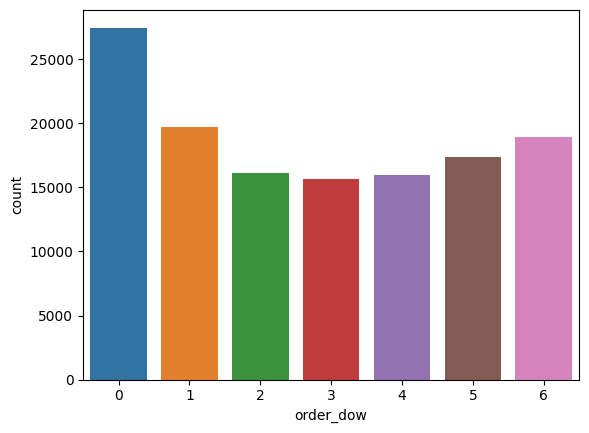

In [23]:
sns.countplot(orders, x="order_dow")

In [28]:
# Q6. 재구매율이 높은 product top10 은?
data.pivot_table(index="product_name", values="reordered", aggfunc="mean").sort_values(by="reordered", ascending=False).head(10)

,reordered
product_name,
Premium Organic Quinoa,1.0
Ultra Conditioning Lip Balm with Kokum Butter,1.0
Original Puffcorn,1.0
Blood Orange Vodka,1.0
Margherita Crispy Flatbread Pizza,1.0
John Frieda Frizz Ease Moisture Barrier Firm Hold Hair Spray,1.0
Super Premium Food for Cats Real Salmon & Brown Rice Recipe,1.0
Shrimp Ring,1.0
Greek & Chia Blood Orange Yogurt,1.0


In [32]:
# Q7 재구매가 많이 일어나는 요일
t_data = pd.merge(data, orders, on="order_id", how="inner")

In [35]:
t_data.pivot_table(index="order_dow", values="reordered", aggfunc="sum").sort_values(by="reordered", ascending=False)

,reordered
order_dow,
0,197534
1,123376
6,123173
5,107239
2,94469
4,92454
3,90579


In [37]:
# Q8. 사람들이 평균적으로 재구매를 하는 기간은?
t_data.days_since_prior_order.mean()

17.0661258672976

In [46]:
# Q9. days_since_prior_order 에 따른 reorder 횟수 변화를 그래프로 그려보자.
t = t_data.pivot_table(index="days_since_prior_order", values="reordered", aggfunc="sum")

In [59]:
t = t.reset_index()[:-1]

<Axes: xlabel='days_since_prior_order', ylabel='reordered'>

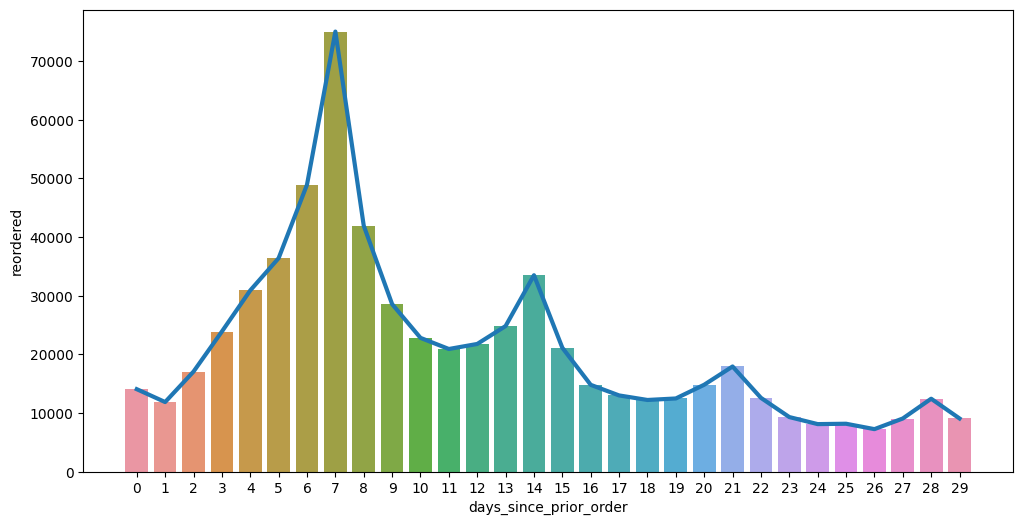

In [62]:
plt.figure(figsize=(12, 6))
sns.barplot(x=t.days_since_prior_order.astype(int), y=t.reordered)
sns.lineplot(x=t.days_since_prior_order.astype(int), y=t.reordered, lw=3)

In [63]:
# Q10. user 들이 구매 패턴에 따라 어떤 그룹으로 묶일까?
# <=> Customer Segmentation
# Q10-1. user 를 어떻게 정의할 것인가? (= user profiling) by user_id.
t_data[t_data.user_id==112108]

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,Bulgarian Yogurt,120,16,dairy eggs,yogurt,112108,train,4,4,10,9.0
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs,other creams cheeses,112108,train,4,4,10,9.0
2,1,22035,8,1,Organic Whole String Cheese,21,16,dairy eggs,packaged cheese,112108,train,4,4,10,9.0
3,1,10246,3,0,Organic Celery Hearts,83,4,produce,fresh vegetables,112108,train,4,4,10,9.0
4,1,49683,4,0,Cucumber Kirby,83,4,produce,fresh vegetables,112108,train,4,4,10,9.0
5,1,13176,6,0,Bag of Organic Bananas,24,4,produce,fresh fruits,112108,train,4,4,10,9.0
6,1,47209,7,0,Organic Hass Avocado,24,4,produce,fresh fruits,112108,train,4,4,10,9.0
7,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned goods,canned meat seafood,112108,train,4,4,10,9.0


In [71]:
# 1. 어떤 department 에 product 를 몇개씩 샀는가 & 2. reordered 비율.
# Count Vectorization(Bag-of-Words) -> 차원이 같도록 벡터화.
# department 에 대해서.
user_matrix = pd.crosstab(t_data.user_id, t_data.department) # => 동일한 공간(21차원-len(department))에 존재
user_matrix

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,2,1,0,0,4,0,0,...,1,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,3,1,3,0,...,0,0,0,0,0,0,1,0,7,5
5,0,0,0,0,0,0,0,1,0,0,...,1,2,0,0,0,1,0,0,4,0
7,0,0,0,5,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
8,0,0,1,0,0,0,1,1,1,0,...,0,0,0,0,0,1,0,0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206199,0,0,2,2,1,0,0,2,0,1,...,0,0,0,1,0,1,0,0,1,10
206200,0,0,0,2,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,9,2
206203,0,0,0,4,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,2,3


In [72]:
# 비슷한 유저를 어떻게 판단할 것인가? -> Clustering
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42)
labels = model.fit_predict(user_matrix)


d:\tutorial_for_data_science\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [74]:
df = pd.DataFrame({'user_id': user_matrix.index, 'group_id': labels})
df

,user_id,group_id
0,1,0
1,2,1
2,5,1
3,7,0
4,8,2
...,...,...
131204,206199,0
131205,206200,2
131206,206203,1
131207,206205,1


In [75]:
data = pd.merge(t_data, df, on='user_id')
data

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,group_id
0,1,49302,1,1,Bulgarian Yogurt,120,16,dairy eggs,yogurt,112108,train,4,4,10,9.0,1
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs,other creams cheeses,112108,train,4,4,10,9.0,1
2,1,22035,8,1,Organic Whole String Cheese,21,16,dairy eggs,packaged cheese,112108,train,4,4,10,9.0,1
3,1,10246,3,0,Organic Celery Hearts,83,4,produce,fresh vegetables,112108,train,4,4,10,9.0,1
4,1,49683,4,0,Cucumber Kirby,83,4,produce,fresh vegetables,112108,train,4,4,10,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384612,3171658,39215,1,1,Scented Multi-Cat Scoopable Cat Litter,41,8,pets,cat food care,122864,train,17,1,5,5.0,0
1384613,3171658,30018,2,1,Prime Filets Turkey Dinner In Gravy,41,8,pets,cat food care,122864,train,17,1,5,5.0,0
1384614,1405796,36690,1,0,Ocean Whitefish & Tuna Feast in Sauteed Seafoo...,41,8,pets,cat food care,57736,train,4,5,17,30.0,0
1384615,1082237,17301,1,0,SauceSations Chicken Dinner in Garden Sauce Ca...,41,8,pets,cat food care,136032,train,8,2,19,30.0,0


In [78]:
g0 = data[data.group_id == 0]
g0.department.value_counts()[:10]

dairy eggs      67335
produce         65664
beverages       59515
snacks          50802
frozen          40224
pantry          30513
household       20970
bakery          18107
deli            15424
canned goods    14479
Name: department, dtype: int64

In [79]:
g1 = data[data.group_id == 1]
g1.department.value_counts()[:10]

produce            188276
dairy eggs         105636
snacks              49104
frozen              43406
beverages           39688
pantry              34759
bakery              21286
canned goods        21147
deli                19582
dry goods pasta     17804
Name: department, dtype: int64

In [80]:
g2 = data[data.group_id == 2]
g2.department.value_counts()[:10]

produce            155147
dairy eggs          44080
snacks              18956
frozen              16796
pantry              15970
beverages           14843
canned goods        11173
deli                 9285
bakery               9001
dry goods pasta      8468
Name: department, dtype: int64